In [13]:
"""
1D Convolution

1. Recently, 1D convnets, typically used with dilated kernels, have been used with great success for audio generation and machine
   translation. In addition to these specific successes, it has long been known that small 1D convnets can offer a fast alternative to
   RNNs for simple tasks such as text classification and timeseries forecasting.

2. The convolution layers introduced previously were 2D convolutions, extracting 2D patches from image tensors and applying an identical
   transformation to every patch. In the same way, you can use 1D convolutions, extracting local 1D patches (subsequences) from sequences.

3. Such 1D convolution layers can recognize local patterns in a sequence. Because the same input transformation is performed on every patch,
   a pattern learned at a certain position in a sentence can later be recognized at a different position, making 1D convnets translation
   invariant (for temporal translations). For instance, a 1D convnet processing sequences of characters using convolution windows of
   size 5 should be able to learn words or word fragments of length 5 or less, and it should be able to recognize these words in any context
   in an input sequence. A character-level 1D convnet is thus able to learn about word morphology

4. You’re already familiar with 2D pooling operations, such as 2D average pooling and max pooling, used in convnets to spatially downsample
   image tensors. The 2D pooling operation has a 1D equivalent: extracting 1D patches (subsequences) from an input and outputting the maximum
   value (max pooling) or average value (average pooling). Just as with 2D convnets, this is used for reducing the length of 1D inputs
   (subsampling). 
"""
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
max_len = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [14]:
"""
1. In Keras, you use a 1D convnet via the Conv1D layer, which has an interface similar to Conv2D. It takes as input 3D tensors with shape
   (samples, time, features) and returns similarly shaped 3D tensors. The convolution window is a 1D window on the temporal axis:
   axis 1 in the input tensor.
 
2. The 1D convnets are structured in the same way as their 2D counterparts: they consist of a stack of Conv1D and MaxPooling1D layers,
   ending in either a global pooling layer or a Flatten layer, that turn the 3D outputs into 2D outputs, allowing you to add one or more
   Dense layers to the model for classification or regression.
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu')) # 32: number of filters, 7: kernal size
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

print(model.summary())

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


/data/home/zhangmu/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 95us/step - loss: 0.7799 - acc: 0.4932 - val_loss: 0.7031 - val_acc: 0.5118
Epoch 2/10
20000/20000 [==============================] - 1s 74us/step - loss: 0.7031 - acc: 0.5218 - val_loss: 0.7065 - val_acc: 0.5128
Epoch 3/10
20000/20000 [==============================] - 2s 76us/step - loss: 0.6864 - acc: 0.5530 - val_loss: 0.7694 - val_acc: 0.4950
Epoch 4/10
20000/20000 [==============================] - 2s 76us/step - loss: 0.6715 - acc: 0.5806 - val_loss: 0.7599 - val_acc: 0.5116
Epoch 5/10
20000/20000 [==============================] - 2s 78us/step - loss: 0.6552 - acc: 0.6164 - val_loss: 0.7351 - val_acc: 0.5158
Epoch 6/10
20000/20000 [==============================] - 2s 78us/step - loss: 0.6390 - acc: 0.6397 - val_loss: 0.6816 - val_acc: 0.5618
Epoch 7/10
20000/20000 [==============================] - 2s 78us/step - loss: 0.6217 - acc: 0.6668 - val_loss: 0.7369 - val_acc:

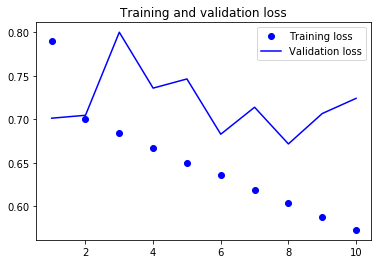

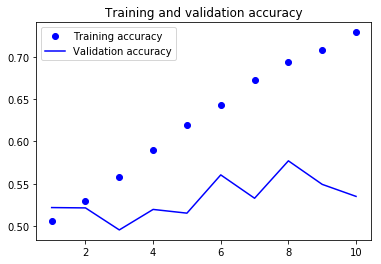

In [8]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [18]:
"""
Combining CNNs and RNNs to process long sequences

1. Because 1D convnets process input patches independently, they aren’t sensitive to the order of the timesteps (beyond a local scale,
   the size of the convolution windows), unlike RNNs. Of course, to recognize longer-term patterns, you can stack many convolution layers
   and pooling layers, resulting in upper layers that will see long chunks of the original inputs—but that’s still a fairly weak way to
   induce order sensitivity.

2. This limitation of convnets isn’t an issue with the IMDB data, because patterns of keywords associated with a positive or negative
   sentiment are informative independently of where they’re found in the input sentences.

3.  One strategy to combine the speed and lightness of convnets with the order-sensitivity of RNNs is to use a 1D convnet as a preprocessing
    step before an RNN. This is especially beneficial when you’re dealing with sequences that are so long they can’t realistically be
    processed with RNNs, such as sequences with thousands of steps. The convnet will turn the long input sequence into much shorter
    (downsampled) sequences of higher-level features. This sequence of extracted features then becomes the input to the RNN part of the
    network.
"""
# load data
import os
import numpy as np

data_dir = './data/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

step = 3
lookback = 720
delay = 144

def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets


train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step)

test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step)

val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

In [19]:
# train
model = Sequential()

model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

print(model.summary())

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, None, 32)          5152      
_________________________________________________________________
gru (GRU)                    (None, 32)                6240      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
500/500 [==============================] - 47s 93ms/step - loss: 0.3360 - val_loss: 0.2838
Epoch 2/20
500/500 [===========

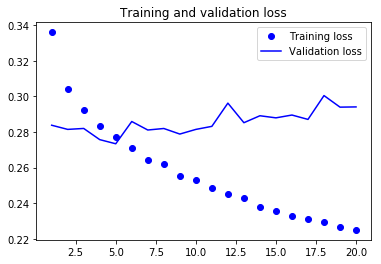

In [22]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
"""
Summary:

1. In the same way that 2D convnets perform well for processing visual patterns in 2D space, 1D convnets perform well for processing
   temporal patterns. They offer a faster alternative to RNNs on some problems, in particular natural language processing tasks.

2. Typically, 1D convnets are structured much like their 2D equivalents from the world of computer vision: they consist of stacks of Conv1D
   layers and MaxPooling1D layers, ending in a global pooling operation or flattening operation.

3. Because RNNs are extremely expensive for processing very long sequences, but 1D convnets are cheap, it can be a good idea to use a 1D
   convnet as a preprocessing step before an RNN, shortening the sequence and extracting useful representations for the RNN to process. 
"""